In [72]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import cv2

(32, 32, 3)


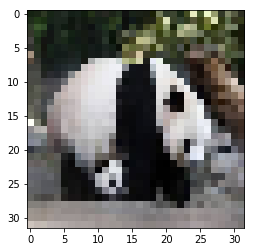

In [73]:
img = mpimg.imread('../input_data/pandas.jpeg',0) 
img = cv2.resize(img, (32, 32))
print img.shape
plt.imshow(img)

In [74]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

(32, 32)


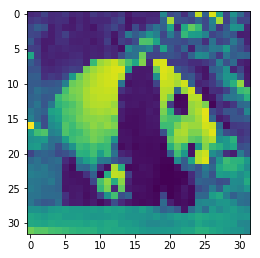

In [75]:
img=rgb2gray(img)
print img.shape
fig, ax = plt.subplots(figsize = (4,6))
plt.imshow(img)
plt.show()

In [76]:
def kernel(size):
    filtr=np.random.randn(size,size)
    return filtr

In [77]:
def sigmoid(value): 
    a = np.exp(-value)
    return 1.0/ (1.0 + a)

def tanh(x):
    return np.tanh(x)

def Relu(x):
#     return x * (x > 0)
    return np.maximum(0,x)

In [78]:
def create_convolved_feature(img,filtr, function):
    img_rows,img_cols=img.shape
    fil_rows,fil_cols=filtr.shape
    bias = np.random.randn(img_rows-fil_rows+1,img_cols-fil_cols+1)
    result=np.zeros((img_rows-fil_rows+1,img_cols-fil_cols+1))
    for i in range(0,img_rows-fil_rows+1):
        for j in range(0,img_cols-fil_cols+1):
            submat=img[i:i+fil_rows,j:j+fil_cols]
            result[i][j]=np.sum(np.multiply(submat,filtr)) + bias[i][j]
            
#     result = np.sum(result,bias)
    result = applyNonLinearity(result, function)
    result = np.array(result)
    return result

In [79]:
def applyNonLinearity(convolution_list, function):
    new_conv_list = []
    for one_conv in convolution_list:
        one_conv = function(one_conv)
        new_conv_list.append(one_conv)
    new_conv_list=np.array(new_conv_list)
    return new_conv_list

In [80]:
def create_cube(img,filtr,depth_of_cube, function):
    cube=[]
    for i in range(depth_of_cube):
        filtr=kernel(5)
        result=create_convolved_feature(img,filtr, function)
        cube.append(result)
    cube=np.array(cube)
    return cube

In [81]:
def displayCube(cube):
    depth = cube.shape[0]
    rows = 2
    cols = depth // rows
    f, axarr = plt.subplots(rows, cols, figsize=(8,8))
    r, c = 0, 0
    for d in cube:
        axarr[r,c].imshow(d)
        c += 1
        if c == cols:
            r += 1
            c = 0

In [82]:
def max_pooling_single(matrix):
    matrix_rows,matrix_cols = matrix.shape
    half = matrix_rows/2
    max_pool_matrix = np.zeros((half,half))
    r, c = 0,0
    for i in range(0,matrix_rows,2): #0,1,2
        for j in range(0,matrix_rows,2): #0,1,2
            submat = matrix[i: i + 2, j : j + 2] #0:2, 0:2
            maxi = np.max(submat)
            max_pool_matrix[r][c] = maxi
            c += 1
            if c == half:
                c = 0
                r += 1
    return max_pool_matrix

In [83]:
def max_pooling(cube):
    length=len(cube)
    result=[]
    for i in range(length):
        temp=max_pooling_single(cube[i])
        result.append(temp)
    result=np.array(result)
    return result

In [84]:
def create_filtr_cube(size,times):
    filtr_cube1=[]
    for i in range(times):
        filtr_temp=kernel(size)
        filtr_cube1.append(filtr_temp)
    filtr_cube1=np.array(filtr_cube1)
    return filtr_cube1

In [85]:
def create_cube_from_cubic_filter(img_cube,filtr_cube,depth_of_new_cube,function):
    img_depth,img_rows,img_cols=img_cube.shape
    fil_depth,fil_rows,fil_cols=filtr_cube.shape
    result_cube=[]
    for d in range(depth_of_new_cube):
        filtr_cube=create_filtr_cube(fil_rows,fil_depth)
        convs=[]
        for i in range(fil_depth):
            convs.append(create_convolved_feature(img_cube[i],filtr_cube[i], function))
        convs=np.array(convs)
        d_x,r_x,c_x=np.shape(convs)
        temp_convolv=np.zeros((r_x,c_x))
        bias = np.random.randn(r_x,c_x)
        for a in range(r_x):
            for b in range(c_x):
                val=0
                for d in range(d_x):
                    val+=convs[d][a][b]
                temp_convolv[a][b]=val+bias[a][b] 
#         temp_convolv=np.sum(temp_convolv,bias)        
        temp_convolv=applyNonLinearity(temp_convolv, function)
        result_cube.append(temp_convolv)
    result_cube=np.array(result_cube)
    return result_cube

In [86]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Relu

In [87]:
filtr=kernel(5)

In [88]:
cube1=create_cube(img,filtr,6, Relu)

# cube1=applyNonLinearity(cube1, Relu)

filter dimentions:  (5, 5)
cube at level 1:  (6, 28, 28)


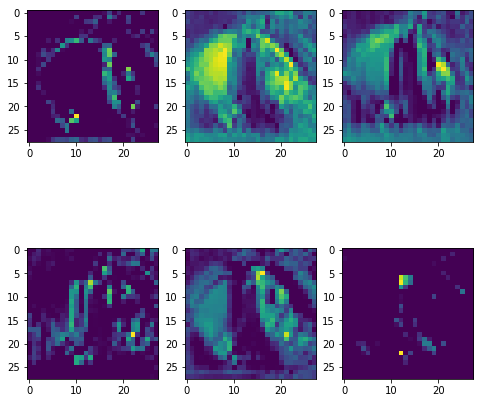

In [89]:
print "filter dimentions: ",filtr.shape
print "cube at level 1: ",cube1.shape
displayCube(cube1)

In [90]:
cube1=max_pooling(cube1)
print "cube dimension after max-pooling: ",cube1.shape

cube dimension after max-pooling:  (6, 14, 14)


cube after max-pooling


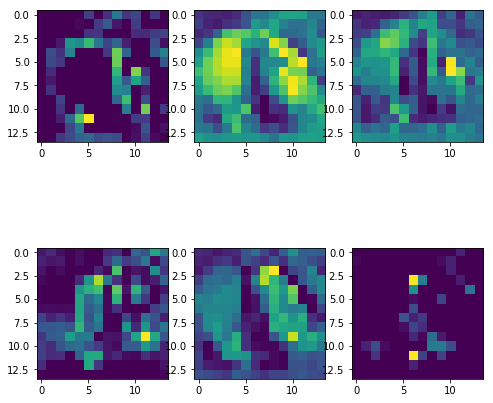

In [91]:
print "cube after max-pooling"
displayCube(cube1)

In [92]:
filtr_cube1=create_filtr_cube(5,6)
cube2=create_cube_from_cubic_filter(cube1,filtr_cube1,16,Relu)

Filter cube dimension:  (6, 5, 5)
Cube at level 2:  (16, 10, 10)


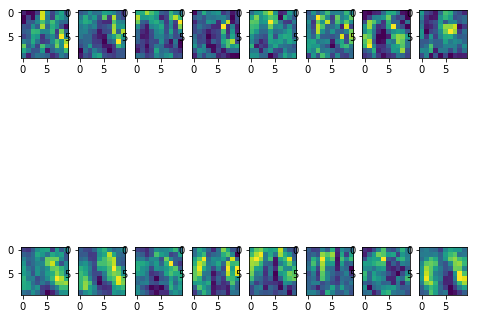

In [93]:
print "Filter cube dimension: ",filtr_cube1.shape
print "Cube at level 2: ", cube2.shape
displayCube(cube2)

In [94]:
cube2=max_pooling(cube2)
print "cube dimension after max-pooling: ",cube2.shape

cube dimension after max-pooling:  (16, 5, 5)


cube after max-pooling


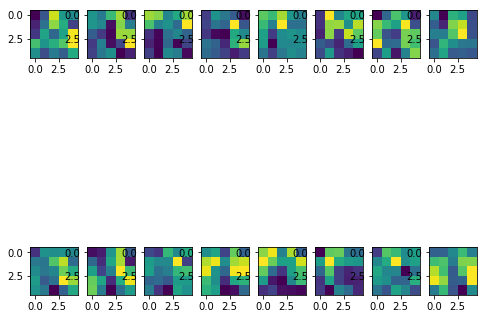

In [95]:
print "cube after max-pooling"
displayCube(cube2)

In [96]:
#flattening
# 5X5X16 120 filters
filtr_cube2=create_filtr_cube(5,16)
cube3=create_cube_from_cubic_filter(cube2,filtr_cube2,120,Relu)
print cube3.shape
print cube3.flatten().shape
full_connection_layer1=cube3.flatten()
full_connection_layer1=np.array(full_connection_layer1)


(120, 1, 1)
(120,)


In [98]:
rand_wt2=np.random.randn(84,120)
fc2_bias_r=np.random.randn(84)

full_connection_layer3=np.dot(rand_wt2,full_connection_layer1)+fc2_bias_r
full_connection_layer3=applyNonLinearity(full_connection_layer3,Relu)
print "Dimensions of FC-layer2: ",full_connection_layer3.shape
# print full_connection_layer3_t

Dimensions of FC-layer2:  (84,)


In [99]:
#gaussian    
# print full_connection_layer3.shape[0]
rand_wt3=np.random.randn(10,84)
full_connection_layer4=np.zeros((10,1))
for i in range(10):
    full_connection_layer4[i,0] = np.sum((full_connection_layer3-rand_wt3[i])**2)
# full_connection_layer4_t=applyNonLinearity(full_connection_layer4_t, tanh)
print "Dimensions of final output layer: ",full_connection_layer4.shape
# print full_connection_layer4

Dimensions of final output layer:  (10, 1)


In [100]:
probability=softmax(full_connection_layer4)
print "Final output"
print probability

Final output
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# tanh

In [101]:
filtr_t=kernel(5)

In [102]:
cube1_t=create_cube(img,filtr_t,6, tanh)
# cube1_t=applyNonLinearity(cube1_t, tanh)

filter dimentions:  (5, 5)
cube at level 1:  (6, 28, 28)


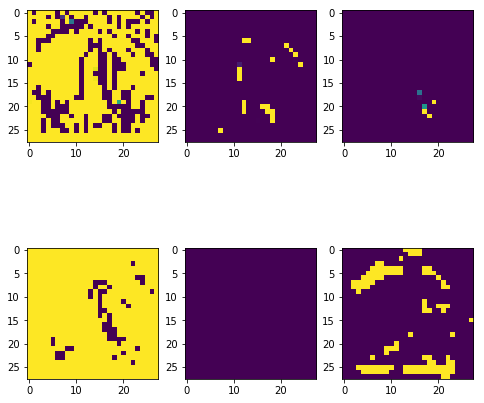

In [103]:
print "filter dimentions: ",filtr_t.shape
print "cube at level 1: ",cube1_t.shape
displayCube(cube1_t)

In [104]:
cube1_t=max_pooling(cube1_t)
print "cube dimension after max-pooling: ",cube1_t.shape

cube dimension after max-pooling:  (6, 14, 14)


cube after max-pooling


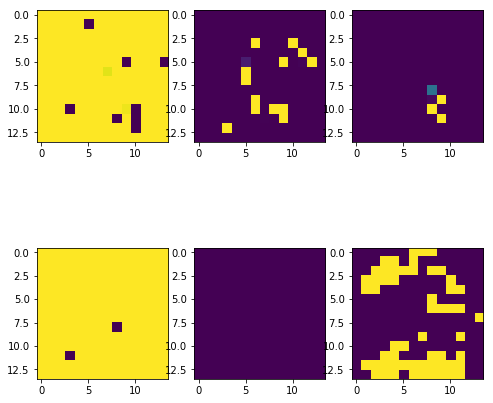

In [105]:
print "cube after max-pooling"
displayCube(cube1_t)

In [106]:
filtr_cube1_t=create_filtr_cube(5,6)
cube2_t=create_cube_from_cubic_filter(cube1_t,filtr_cube1_t,16,tanh)

Filter cube dimension:  (6, 5, 5)
Cube at level 2:  (16, 10, 10)


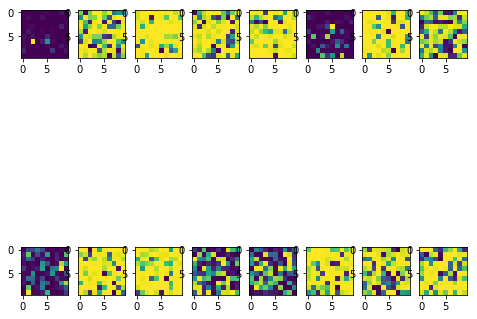

In [107]:
print "Filter cube dimension: ",filtr_cube1_t.shape
print "Cube at level 2: ", cube2_t.shape
displayCube(cube2_t)

In [108]:
cube2_t=max_pooling(cube2_t)
print "cube dimension after max-pooling: ",cube2_t.shape

cube dimension after max-pooling:  (16, 5, 5)


cube after max-pooling


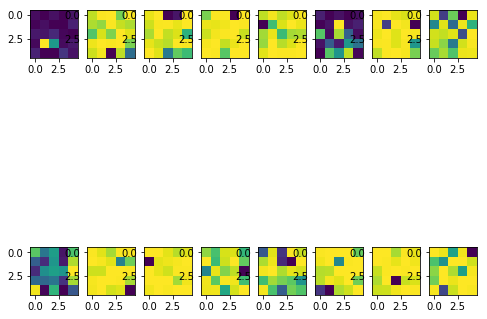

In [109]:
print "cube after max-pooling"
displayCube(cube2_t)

In [110]:
#flattening
# 5X5X16 120 filters
filtr_cube2_t=create_filtr_cube(5,16)
cube3_t=create_cube_from_cubic_filter(cube2_t,filtr_cube2_t,120,tanh)
print cube3_t.shape
print cube3_t.flatten().shape
full_connection_layer1_t=cube3_t.flatten()
full_connection_layer1_t=np.array(full_connection_layer1_t)


(120, 1, 1)
(120,)


In [113]:
rand_wt2_t=np.random.randn(84,120)
fc2_bias=np.random.randn(84)
full_connection_layer3_t=np.dot(rand_wt2_t,full_connection_layer1_t)+fc2_bias
full_connection_layer3_t=applyNonLinearity(full_connection_layer3_t,tanh)
print "Dimensions of FC-layer2: ",full_connection_layer3_t.shape
# print full_connection_layer3_t

Dimensions of FC-layer2:  (84,)


In [114]:
#gaussian    
rand_wt3_t=np.random.randn(10,84)
full_connection_layer4_t=np.zeros((10,1))
for i in range(10):
    full_connection_layer4_t[i,0] = np.sum((full_connection_layer3_t-rand_wt3_t[i])**2)
# full_connection_layer4_t=applyNonLinearity(full_connection_layer4_t, tanh)
print "Dimensions of final output layer: ",full_connection_layer4_t.shape
# print full_connection_layer4_t

Dimensions of final output layer:  (10, 1)


In [115]:
probability=softmax(full_connection_layer4_t)
print "Final output"
print probability

Final output
[[1.87036738e-28]
 [1.53099347e-10]
 [1.78066880e-21]
 [2.29189668e-06]
 [4.90640105e-25]
 [5.91542374e-14]
 [5.22386812e-30]
 [2.83413990e-16]
 [9.33434577e-17]
 [9.99997708e-01]]


# Sigmoid

In [116]:
filtr_s=kernel(5)

In [117]:
cube1_s=create_cube(img,filtr_s,6, sigmoid)
# cube1_s=applyNonLinearity(cube1_s, sigmoid)
# print cube1_s

/home/prabha/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


filter dimentions:  (5, 5)
cube at level 1:  (6, 28, 28)


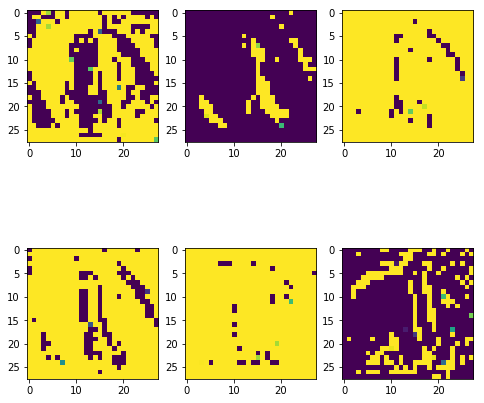

In [118]:
print "filter dimentions: ",filtr_s.shape
print "cube at level 1: ",cube1_s.shape
displayCube(cube1_s)

In [119]:
cube1_s=max_pooling(cube1_s)
print "cube dimension after max-pooling: ",cube1_s.shape

cube dimension after max-pooling:  (6, 14, 14)


cube after max-pooling


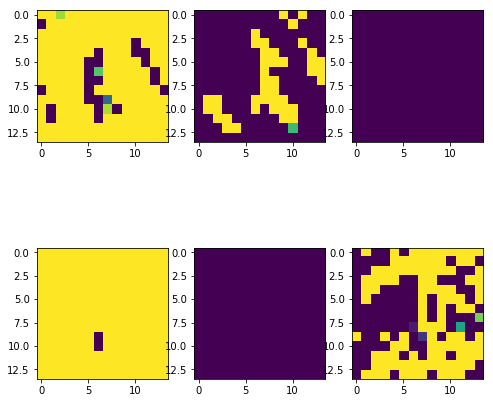

In [120]:
print "cube after max-pooling"
displayCube(cube1_s)

In [121]:
filtr_cube1_s=create_filtr_cube(5,6)
cube2_s=create_cube_from_cubic_filter(cube1_s,filtr_cube1_s,16,sigmoid)

Filter cube dimension:  (6, 5, 5)
Cube at level 2:  (16, 10, 10)


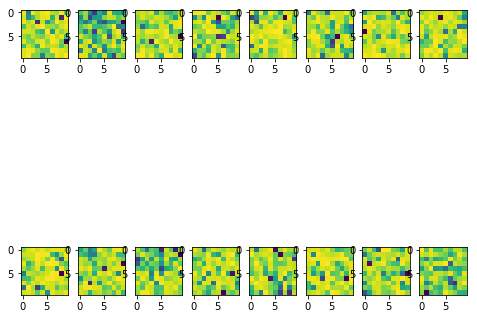

In [122]:
print "Filter cube dimension: ",filtr_cube1_s.shape
print "Cube at level 2: ", cube2_s.shape
displayCube(cube2_s)

In [123]:
cube2_s=max_pooling(cube2_s)
print "cube dimension after max-pooling: ",cube2_s.shape

cube dimension after max-pooling:  (16, 5, 5)


cube after max-pooling


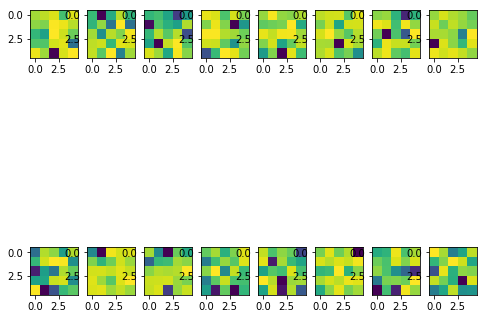

In [124]:
print "cube after max-pooling"
displayCube(cube2_s)

In [125]:
#flattening
# 5X5X16 120 filters
filtr_cube2_s=create_filtr_cube(5,16)
cube3_s=create_cube_from_cubic_filter(cube2_s,filtr_cube2_s,120,sigmoid)
print cube3_s.shape
print cube3_s.flatten().shape
full_connection_layer1_s=cube3_s.flatten()
full_connection_layer1_s=np.array(full_connection_layer1_s)


(120, 1, 1)
(120,)


In [128]:
rand_wt2_s=np.random.randn(84,120)
fc2_bias_s=np.random.randn(84)
full_connection_layer3_s=np.dot(rand_wt2_s,full_connection_layer1_s)+fc2_bias_s
full_connection_layer3_s=applyNonLinearity(full_connection_layer3_s,sigmoid)
print "Dimensions of FC-layer2: ",full_connection_layer3_s.shape
# print full_connection_layer3_t

Dimensions of FC-layer2:  (84,)


In [129]:
#gaussian    
rand_wt3_s=np.random.randn(10,84)
full_connection_layer4_s=np.zeros((10,1))
for i in range(10):
    full_connection_layer4_s[i,0] = np.sum((full_connection_layer3_s-rand_wt3_s[i])**2)
# full_connection_layer4_t=applyNonLinearity(full_connection_layer4_t, tanh)
print "Dimensions of final output layer: ",full_connection_layer4_s.shape
# print full_connection_layer4_s

Dimensions of final output layer:  (10, 1)


In [130]:
probability=softmax(full_connection_layer4_s)
print "Final output"
print probability

Final output
[[1.30233465e-25]
 [1.37412689e-21]
 [1.28208785e-25]
 [4.57907393e-22]
 [7.60373862e-06]
 [1.27847895e-17]
 [9.99992396e-01]
 [1.62575335e-13]
 [4.97937667e-22]
 [2.91218040e-19]]
